<a href="https://colab.research.google.com/github/jrDhiraj/machineLearning/blob/main/Mall_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [80]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [82]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [83]:
categorical_col = df.select_dtypes(include='object').columns.tolist()

In [84]:
categorical_col

['Gender']

In [85]:
customer_ids = df['CustomerID']   # save before dropping
df = df.drop('CustomerID', axis=1)

In [86]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [87]:
numerical_col = df.select_dtypes(include='number').columns.tolist()

In [88]:
numerical_col

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

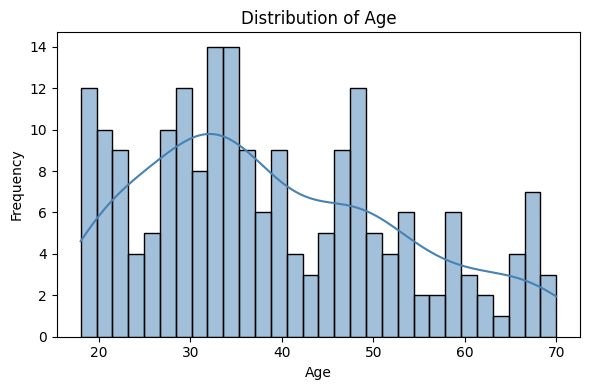

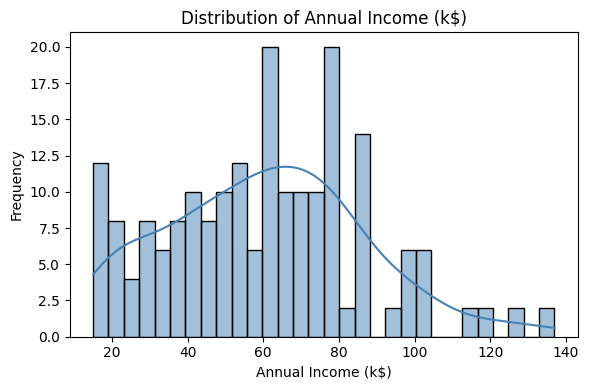

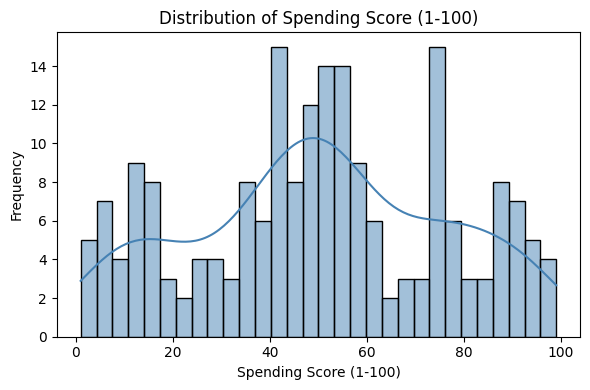

In [89]:
for col in numerical_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

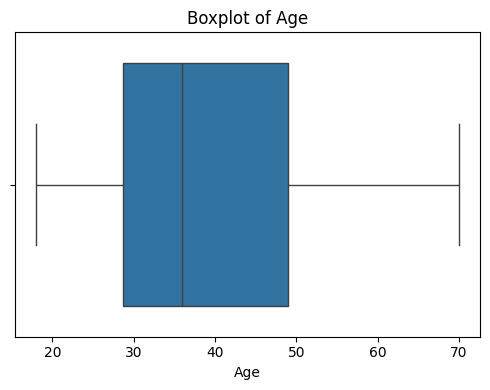

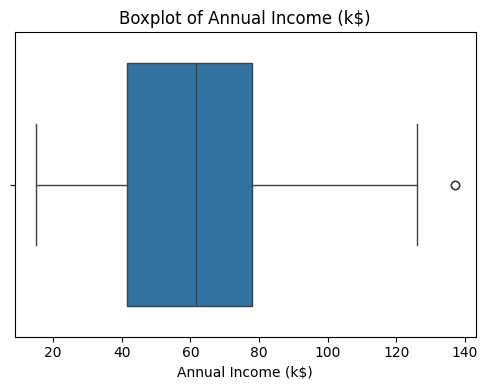

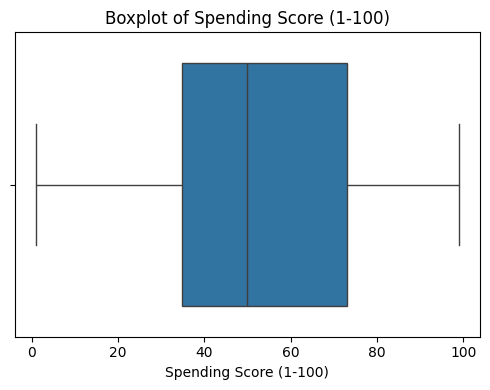

In [90]:
for col in numerical_col:
  plt.figure(figsize=(5,4))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.tight_layout()
  plt.show()

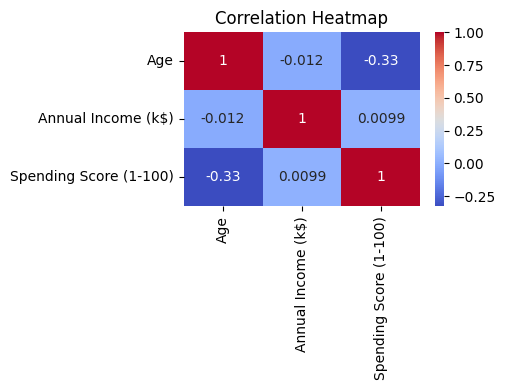

In [91]:
plt.figure(figsize=(5,4))
sns.heatmap(df[numerical_col].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

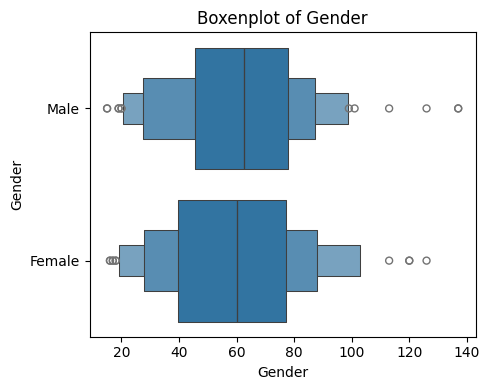

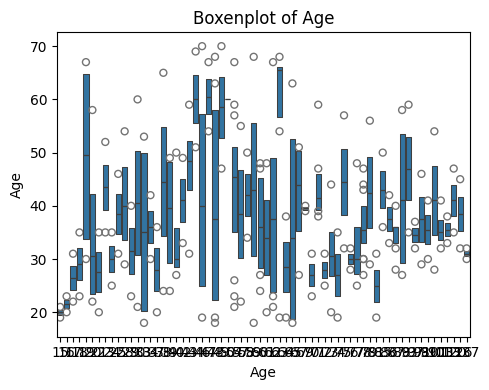

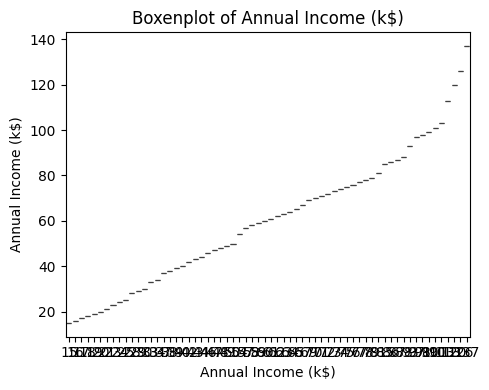

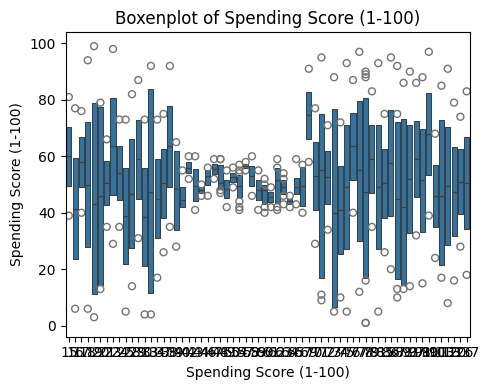

In [92]:
for col in df.columns:
  plt.figure(figsize=(5,4))
  sns.boxenplot(x=df['Annual Income (k$)'],y = df[col] )
  plt.title(f'Boxenplot of {col}')
  plt.xlabel(col)
  plt.tight_layout()
  plt.show()

In [93]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [94]:

df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [95]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [96]:
df['Gender_Male'] = df['Gender_Male'].astype(int)

In [97]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [98]:
from sklearn.cluster import KMeans
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

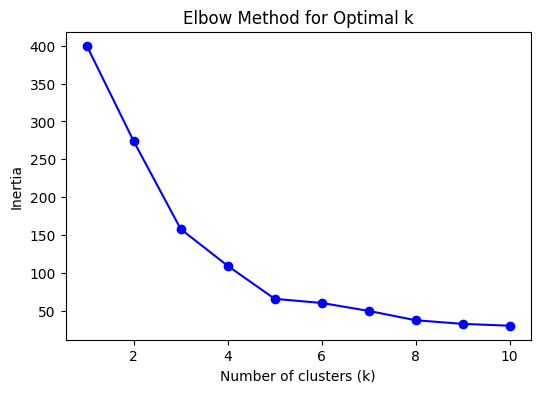

In [104]:
inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [105]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [106]:
df['Cluster'] = y_kmeans
df.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,19,15,39,1,4
1,21,15,81,1,2
2,20,16,6,0,4
3,23,16,77,0,2
4,31,17,40,0,4


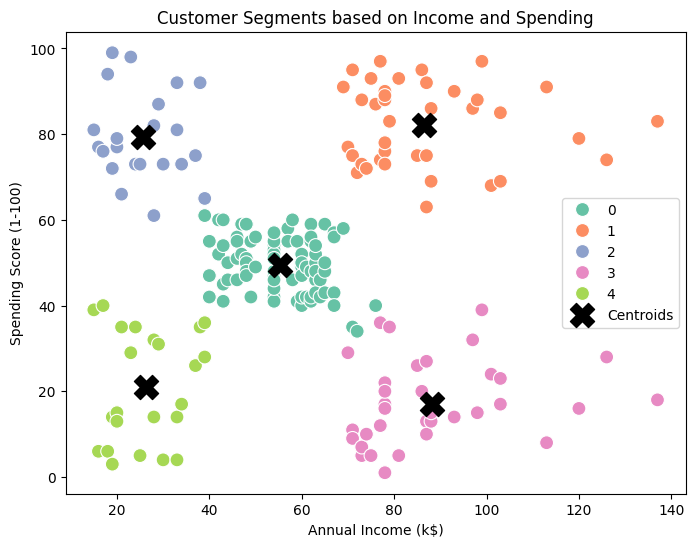

In [107]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set2',
    data=df,
    s=100
)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c='black', marker='X', label='Centroids')
plt.title('Customer Segments based on Income and Spending')
plt.legend()
plt.show()
